In [77]:
# pulled this long list from somewhere and added to it.  Not using everything here

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [166]:
ml_tables_dir = './ML_data/'

ml_file = 'ML-table-weekly.csv'


df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()
print(df_ml.shape)
print(df_ml.head())

# Happily, there are no null values in my ML table
print(df_ml.isnull().values.any())
# yields False

/var/folders/b9/nh8wdd1s6g12c793c67f2r9r0000gn/T/ipykernel_38011/1158469220.py:6: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()


(8575, 365)
   year state_name county_name  yield  nutr_ret_high  suit_irrig_high_soy  \
0  2000     KANSAS       ALLEN   40.0           10.0              10000.0   
1  2000     KANSAS    ANDERSON   44.0           10.0              10000.0   
2  2000     KANSAS    ATCHISON   44.0           10.0              10000.0   
3  2000     KANSAS      BARBER   37.0           10.0              10000.0   
4  2000     KANSAS      BARTON   44.0           10.0              10000.0   

   AEZ_1  AEZ_2  AEZ_3  AEZ_4  ... week_51__PRECTOTCORR week_51__GWETROOT  \
0  False  False  False  False  ...                 0.37          0.590000   
1  False  False  False  False  ...                 0.33          0.584286   
2  False  False  False  False  ...                 1.76          0.577143   
3  False  False  False  False  ...                 0.28          0.450000   
4  False  False  False  False  ...                 1.84          0.474286   

  week_51__EVPTRNS week_51__ALLSKY_SFC_PAR_TOT week_52__T2M_MA

In [204]:
print(len(df_ml))

8575


In [167]:
print(df_ml.columns)

Index(['year', 'state_name', 'county_name', 'yield', 'nutr_ret_high',
       'suit_irrig_high_soy', 'AEZ_1', 'AEZ_2', 'AEZ_3', 'AEZ_4',
       ...
       'week_51__PRECTOTCORR', 'week_51__GWETROOT', 'week_51__EVPTRNS',
       'week_51__ALLSKY_SFC_PAR_TOT', 'week_52__T2M_MAX', 'week_52__T2M_MIN',
       'week_52__PRECTOTCORR', 'week_52__GWETROOT', 'week_52__EVPTRNS',
       'week_52__ALLSKY_SFC_PAR_TOT'],
      dtype='object', length=365)


In [168]:
df_ml_dropped = df_ml.dropna()
for idx, i in enumerate(df_ml_dropped.isnull().sum()):
    print(i, df_ml_dropped.columns[idx])
print(len(df_ml))
print(len(df_ml_dropped))

0 year
0 state_name
0 county_name
0 yield
0 nutr_ret_high
0 suit_irrig_high_soy
0 AEZ_1
0 AEZ_2
0 AEZ_3
0 AEZ_4
0 AEZ_5
0 AEZ_6
0 AEZ_7
0 AEZ_8
0 AEZ_9
0 AEZ_10
0 AEZ_11
0 AEZ_12
0 AEZ_13
0 AEZ_14
0 AEZ_15
0 AEZ_16
0 AEZ_17
0 AEZ_18
0 AEZ_19
0 AEZ_20
0 AEZ_21
0 SQH_1
0 SQH_2
0 SQH_3
0 SQH_4
0 SQH_5
0 SQH_6
0 SQH_7
0 SQH_8
0 SQH_9
0 SQH_10
0 SQL_1
0 SQL_2
0 SQL_3
0 SQL_4
0 SQL_5
0 SQL_6
0 SQL_7
0 SQL_8
0 SQL_9
0 SQL_10
0 week_00__T2M_MAX
0 week_00__T2M_MIN
0 week_00__PRECTOTCORR
0 week_00__GWETROOT
0 week_00__EVPTRNS
0 week_00__ALLSKY_SFC_PAR_TOT
0 week_01__T2M_MAX
0 week_01__T2M_MIN
0 week_01__PRECTOTCORR
0 week_01__GWETROOT
0 week_01__EVPTRNS
0 week_01__ALLSKY_SFC_PAR_TOT
0 week_02__T2M_MAX
0 week_02__T2M_MIN
0 week_02__PRECTOTCORR
0 week_02__GWETROOT
0 week_02__EVPTRNS
0 week_02__ALLSKY_SFC_PAR_TOT
0 week_03__T2M_MAX
0 week_03__T2M_MIN
0 week_03__PRECTOTCORR
0 week_03__GWETROOT
0 week_03__EVPTRNS
0 week_03__ALLSKY_SFC_PAR_TOT
0 week_04__T2M_MAX
0 week_04__T2M_MIN
0 week_04__PRECTOTCO

In [169]:
X = df_ml.drop(columns=['yield'])
y = df_ml.loc[:,['yield']]

print(X.shape)
print(y.shape)
 
# print(X.head())
# print(y.head())

(8575, 364)
(8575, 1)


In [170]:
# For this pipeline I will do random shuffling of the input records before separating the test set
# Choosing random_state=0 (or any specific integer) will ensure that different runs will use same shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# keeping a copy of y_test, because it may get modified below
y_test_orig = y_test.copy()

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())
print()
print(y_test_orig.head())
# note: index of first row in y_test_orig is 7397)

print()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()
print(y_test.iloc[0,0])

      year    state_name county_name  nutr_ret_high  suit_irrig_high_soy  \
4518  2009         TEXAS       COOKE           10.0               7778.0   
8563  2022         TEXAS       MILAM           10.0               7778.0   
9     2000        KANSAS  CHAUTAUQUA           10.0              10000.0   
7404  2018         TEXAS        BELL           10.0               7778.0   
3723  2007  SOUTH DAKOTA   CODINGTON           10.0              10000.0   

      AEZ_1  AEZ_2  AEZ_3  AEZ_4  AEZ_5  ... week_51__PRECTOTCORR  \
4518  False  False  False  False  False  ...                20.06   
8563  False  False  False  False  False  ...                12.04   
9     False  False  False  False  False  ...                 0.28   
7404  False  False  False  False   True  ...                45.28   
3723  False  False  False  False  False  ...                 4.29   

     week_51__GWETROOT week_51__EVPTRNS week_51__ALLSKY_SFC_PAR_TOT  \
4518          0.695714         0.047143                  

In [171]:
X_train = X_train.drop(columns=['year','state_name','county_name'])
X_test = X_test.drop(columns=['year','state_name','county_name'])


scalerXST = StandardScaler().fit(X_train)
scaleryST = StandardScaler().fit(y_train)

X_trainST = scalerXST.transform(X_train)
y_trainST = scaleryST.transform(y_train)
X_testST = scalerXST.transform(X_test)
y_testST = scaleryST.transform(y_test)



In [172]:
# testing how inverse of the scaling is working

# basically, if scalery was your scaling function, then use scalery.inverse_transform;
#   NOTE: this works on a sequence

# print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testST[0]) #.loc[[1277]])
print(scaleryST.inverse_transform(y_testST)[0])

[0.84426362]
[49.3]


## Lasso

In [173]:
# confusingly, you set the "lambda" variable of LASSO algorithm using the parameter "alpha"
# alpha can take values between 0 and 1; using 1.0 is "full penalty", so maximum attempts to remove features
# lassoST = Lasso(alpha=1.0)
# lassoST = Lasso(alpha=0.5)
# lassoST = Lasso(alpha=0.2)
lassoST = Lasso(alpha=0.1)
lassoST.fit(X_trainST, y_trainST)

Lasso(alpha=0.1)

In [174]:
y_predST = lassoST.predict(X_testST)

print(y_predST)

[ 0.22719964 -0.62578112 -0.50409719 ... -0.50774649 -0.33024494
 -0.1949225 ]


In [175]:
import math

def sum_squared(y):
    return sum([i*i for i in y])

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = rmseST / (0.5)
# rrmseST = rmseST / sum_squared(y_testST)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)

0.8052153840671199
1.6104307681342398
0.3662508918144056


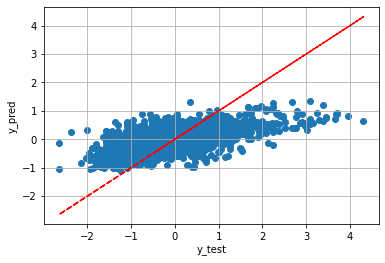

In [176]:
# from chatGPT!

import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, descrip_of_run):
    # Check if the arrays have the same length
    if len(y_test) != len(y_pred):
        raise ValueError("The input arrays must have the same length.")

    # Create a scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Line y_pred = y_test
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
#     plt.title('Predicted vs Actual for ' + descrip_of_run)
    plt.grid(True)
    plt.show()

# Example usage
# y_test = np.array([1, 2, 3, 4, 5])
# y_pred = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

plot_predictions(y_testST, y_predST, 'Lasso with StandardScalar')


## Linear regression

In [177]:
linearST = LinearRegression()

In [178]:
print(type(y_trainST))

linearST.fit(X_trainST,y_trainST)

<class 'numpy.ndarray'>


LinearRegression()

0.6250555430875002
0.7906045427946263
0.6181168857289653


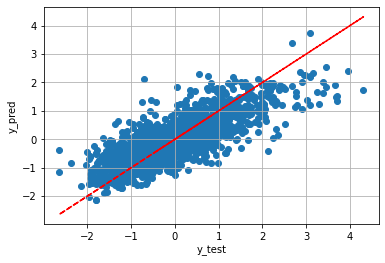

In [179]:
y_predST = linearST.predict(X_testST)

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = math.sqrt(rmseST)# (0.5)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)

plot_predictions(y_testST, y_predST, 'Linear Regression using StandardScaler')


### Min Max scalar

In [180]:
scalerXMM = MinMaxScaler().fit(X_train)
scaleryMM = MinMaxScaler().fit(y_train)

X_trainMM = scalerXMM.transform(X_train)
y_trainMM = scaleryMM.transform(y_train)
X_testMM = scalerXMM.transform(X_test)
y_testMM = scaleryMM.transform(y_test)



In [181]:
# testing how inverse of the scaling is working with MinMaxScaler

# print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testMM[0])
print(scaleryMM.inverse_transform(y_testMM)[0])

[0.40912863]
[49.3]


0.07323065886936767
0.14646131773873533
0.6181526532226981


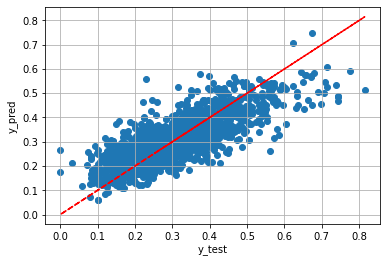

In [182]:
linearMM = LinearRegression()

linearMM.fit(X_trainMM,y_trainMM)

y_predMM = linearMM.predict(X_testMM)

rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Linear Regression using MinMaxScaler')



## Random Forest

0.06199366962489986
0.12398733924979972
0.7263480273011125


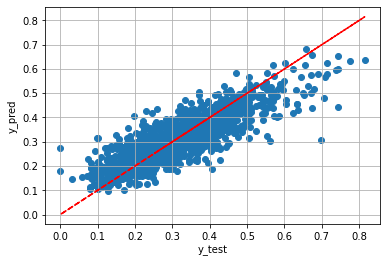

In [183]:
# random forest regressor
# regrMM = RandomForestRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473
# regrMM = RandomForestRegressor(max_depth=10, random_state=0)
#   with depth 10:
# 0.06397662809467218
# 0.12795325618934436
# 0.7085617250365808
regrMM = RandomForestRegressor(max_depth=30, random_state=0)
# 0.11031130262769574
# 0.22062260525539149
# 0.5883965221916605
#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')


0.06242722987883
0.12485445975766
0.7225070062012477


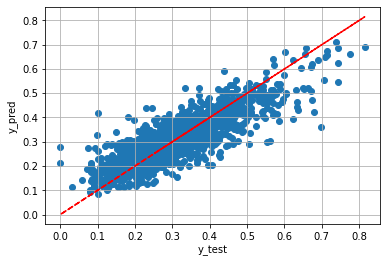

In [184]:
# Gradient Boost regressor
# regrMM = GradientBoostingRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473
regrMM = GradientBoostingRegressor(max_depth=10, random_state=0)
#   with depth 10:
# 0.06397662809467218
# 0.12795325618934436
# 0.7085617250365808
# regrMM = GradientBoostingRegressor(max_depth=20, random_state=0)
#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')